In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_excel(r'C:\Users\hp\Downloads\Data-Train.xlsx')

In [5]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# EDA

In [6]:
df.shape

(10683, 11)

In [7]:
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [8]:
# regression problem

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Route'].fillna(df['Route'].mode()[0],inplace=True)

In [11]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
#no null values

In [14]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [15]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
19h 50m      1
47h 40m      1
13h 35m      1
35h 20m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

In [17]:
# data visulazation

In [18]:
catg = df.select_dtypes('object')

In [19]:
catg.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  
1    05:50         13:15   7h 25m     2 stops         No info  
2    09:25  04:25 10 Jun      19h     2 stops         No info  
3    18:05         23:30   5h 25m      1 stop         No info  
4    16:50         21:35   4h 45m      1 stop         No info

<AxesSubplot:xlabel='Airline', ylabel='count'>

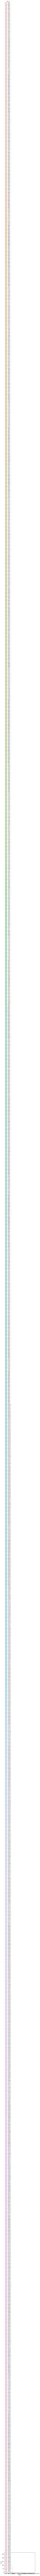

In [20]:
sns.countplot(df['Airline'],hue='Price',data=df)

<AxesSubplot:xlabel='Source', ylabel='count'>

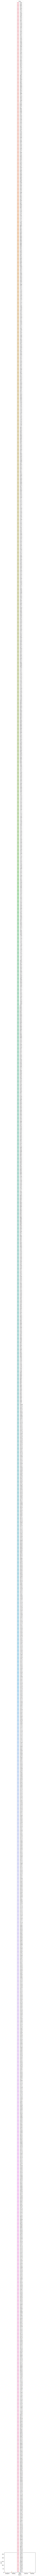

In [21]:
sns.countplot(df['Source'],hue='Price',data=df)

<AxesSubplot:xlabel='Destination', ylabel='count'>

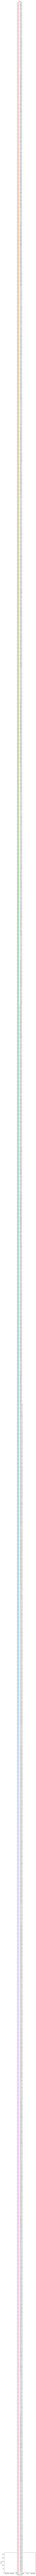

In [22]:
sns.countplot(df['Destination'],hue='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

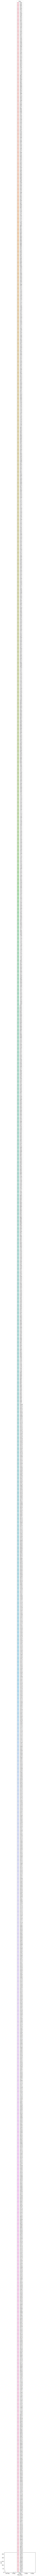

In [23]:
sns.countplot(df['Total_Stops'],hue='Price',data=df)

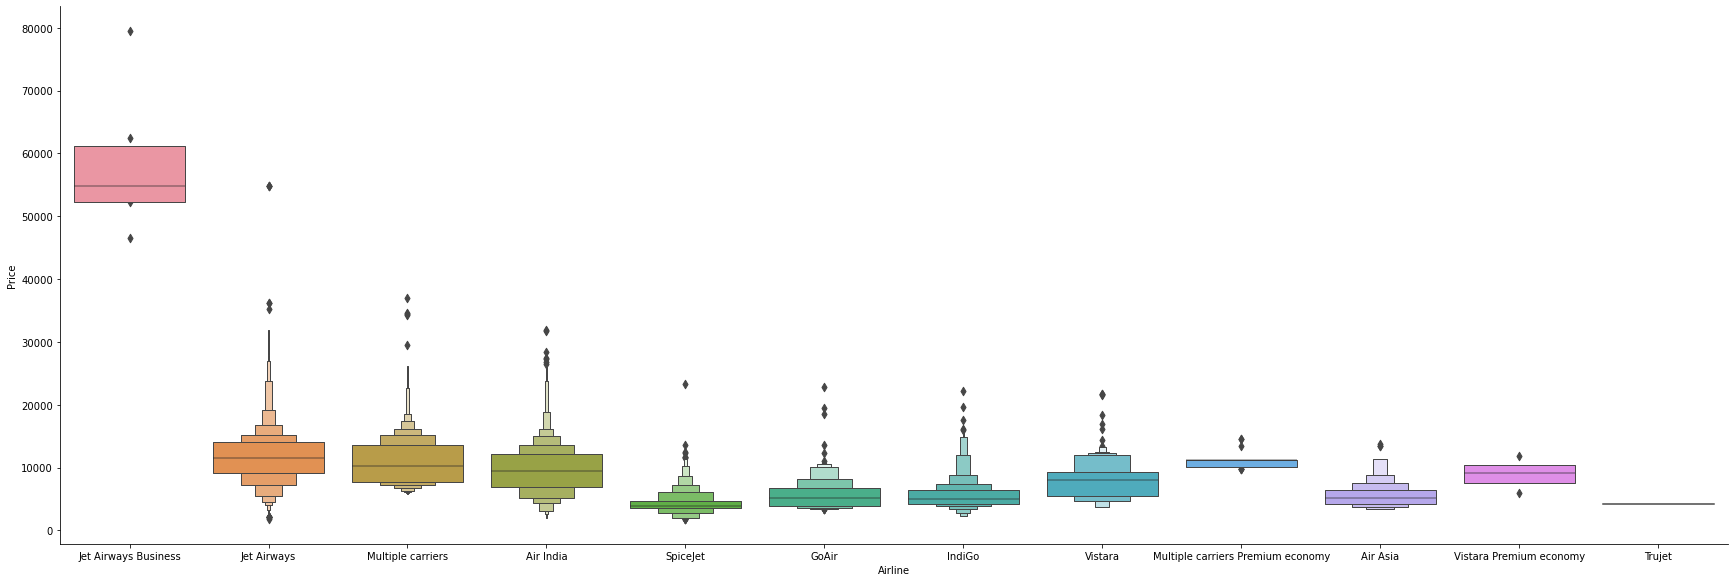

In [24]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)

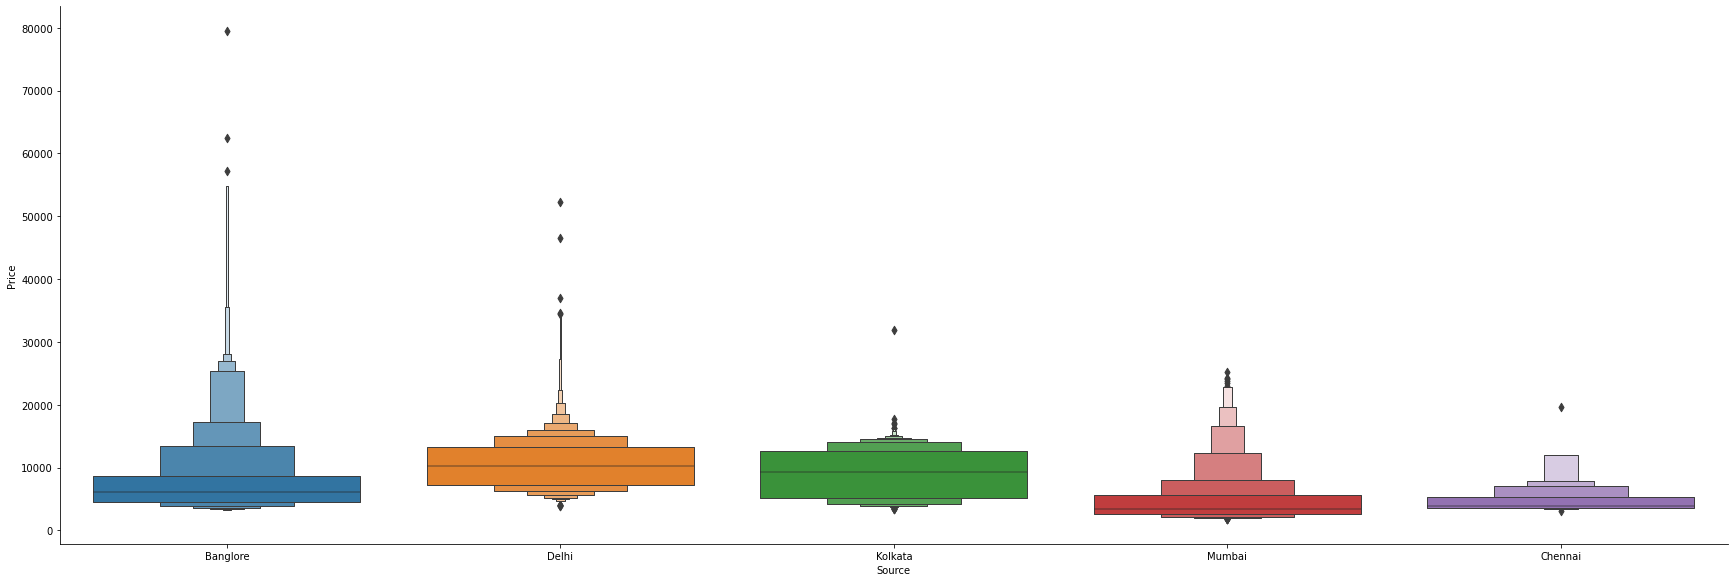

In [25]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)

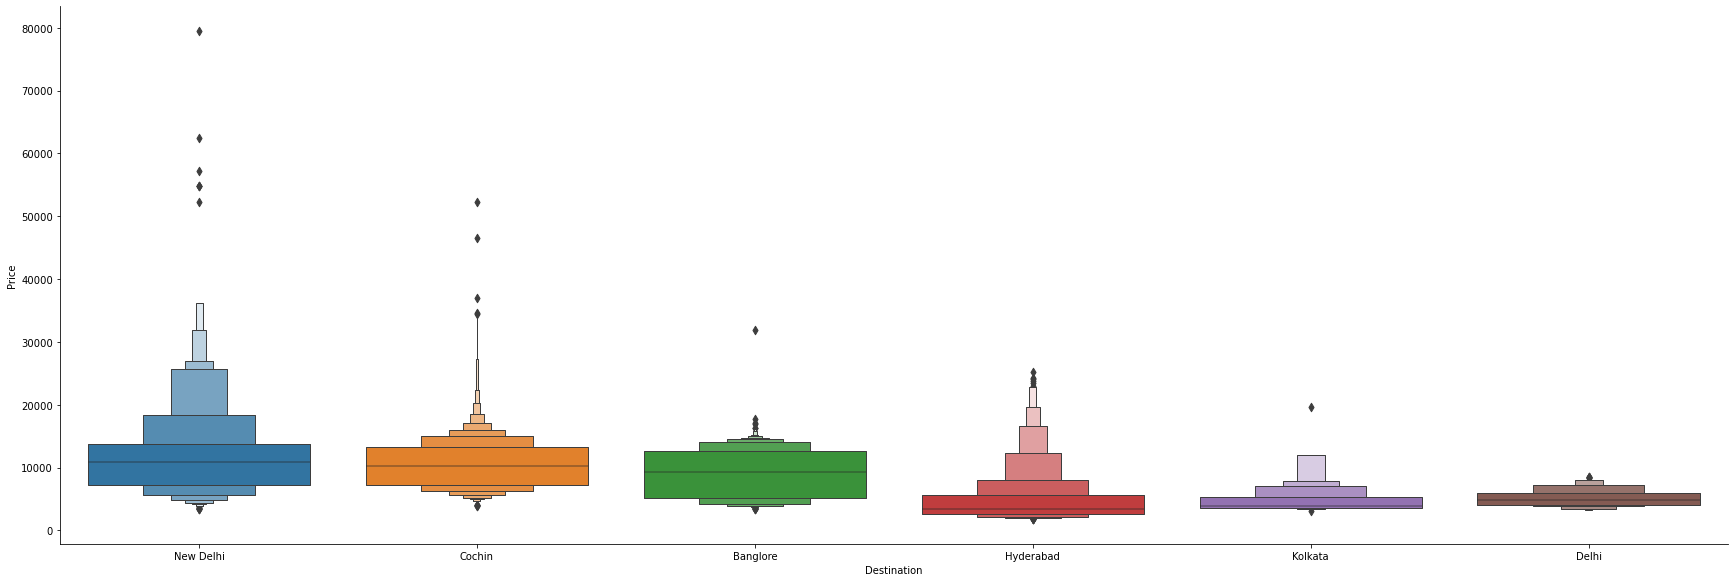

In [26]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)

In [27]:
cont=df.select_dtypes('number')

In [28]:
cont.head()

Price
0   3897
1   7662
2  13882
3   6218
4  13302

In [29]:
#some columns are categorical convert numerical

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [32]:
df.dtypes

Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

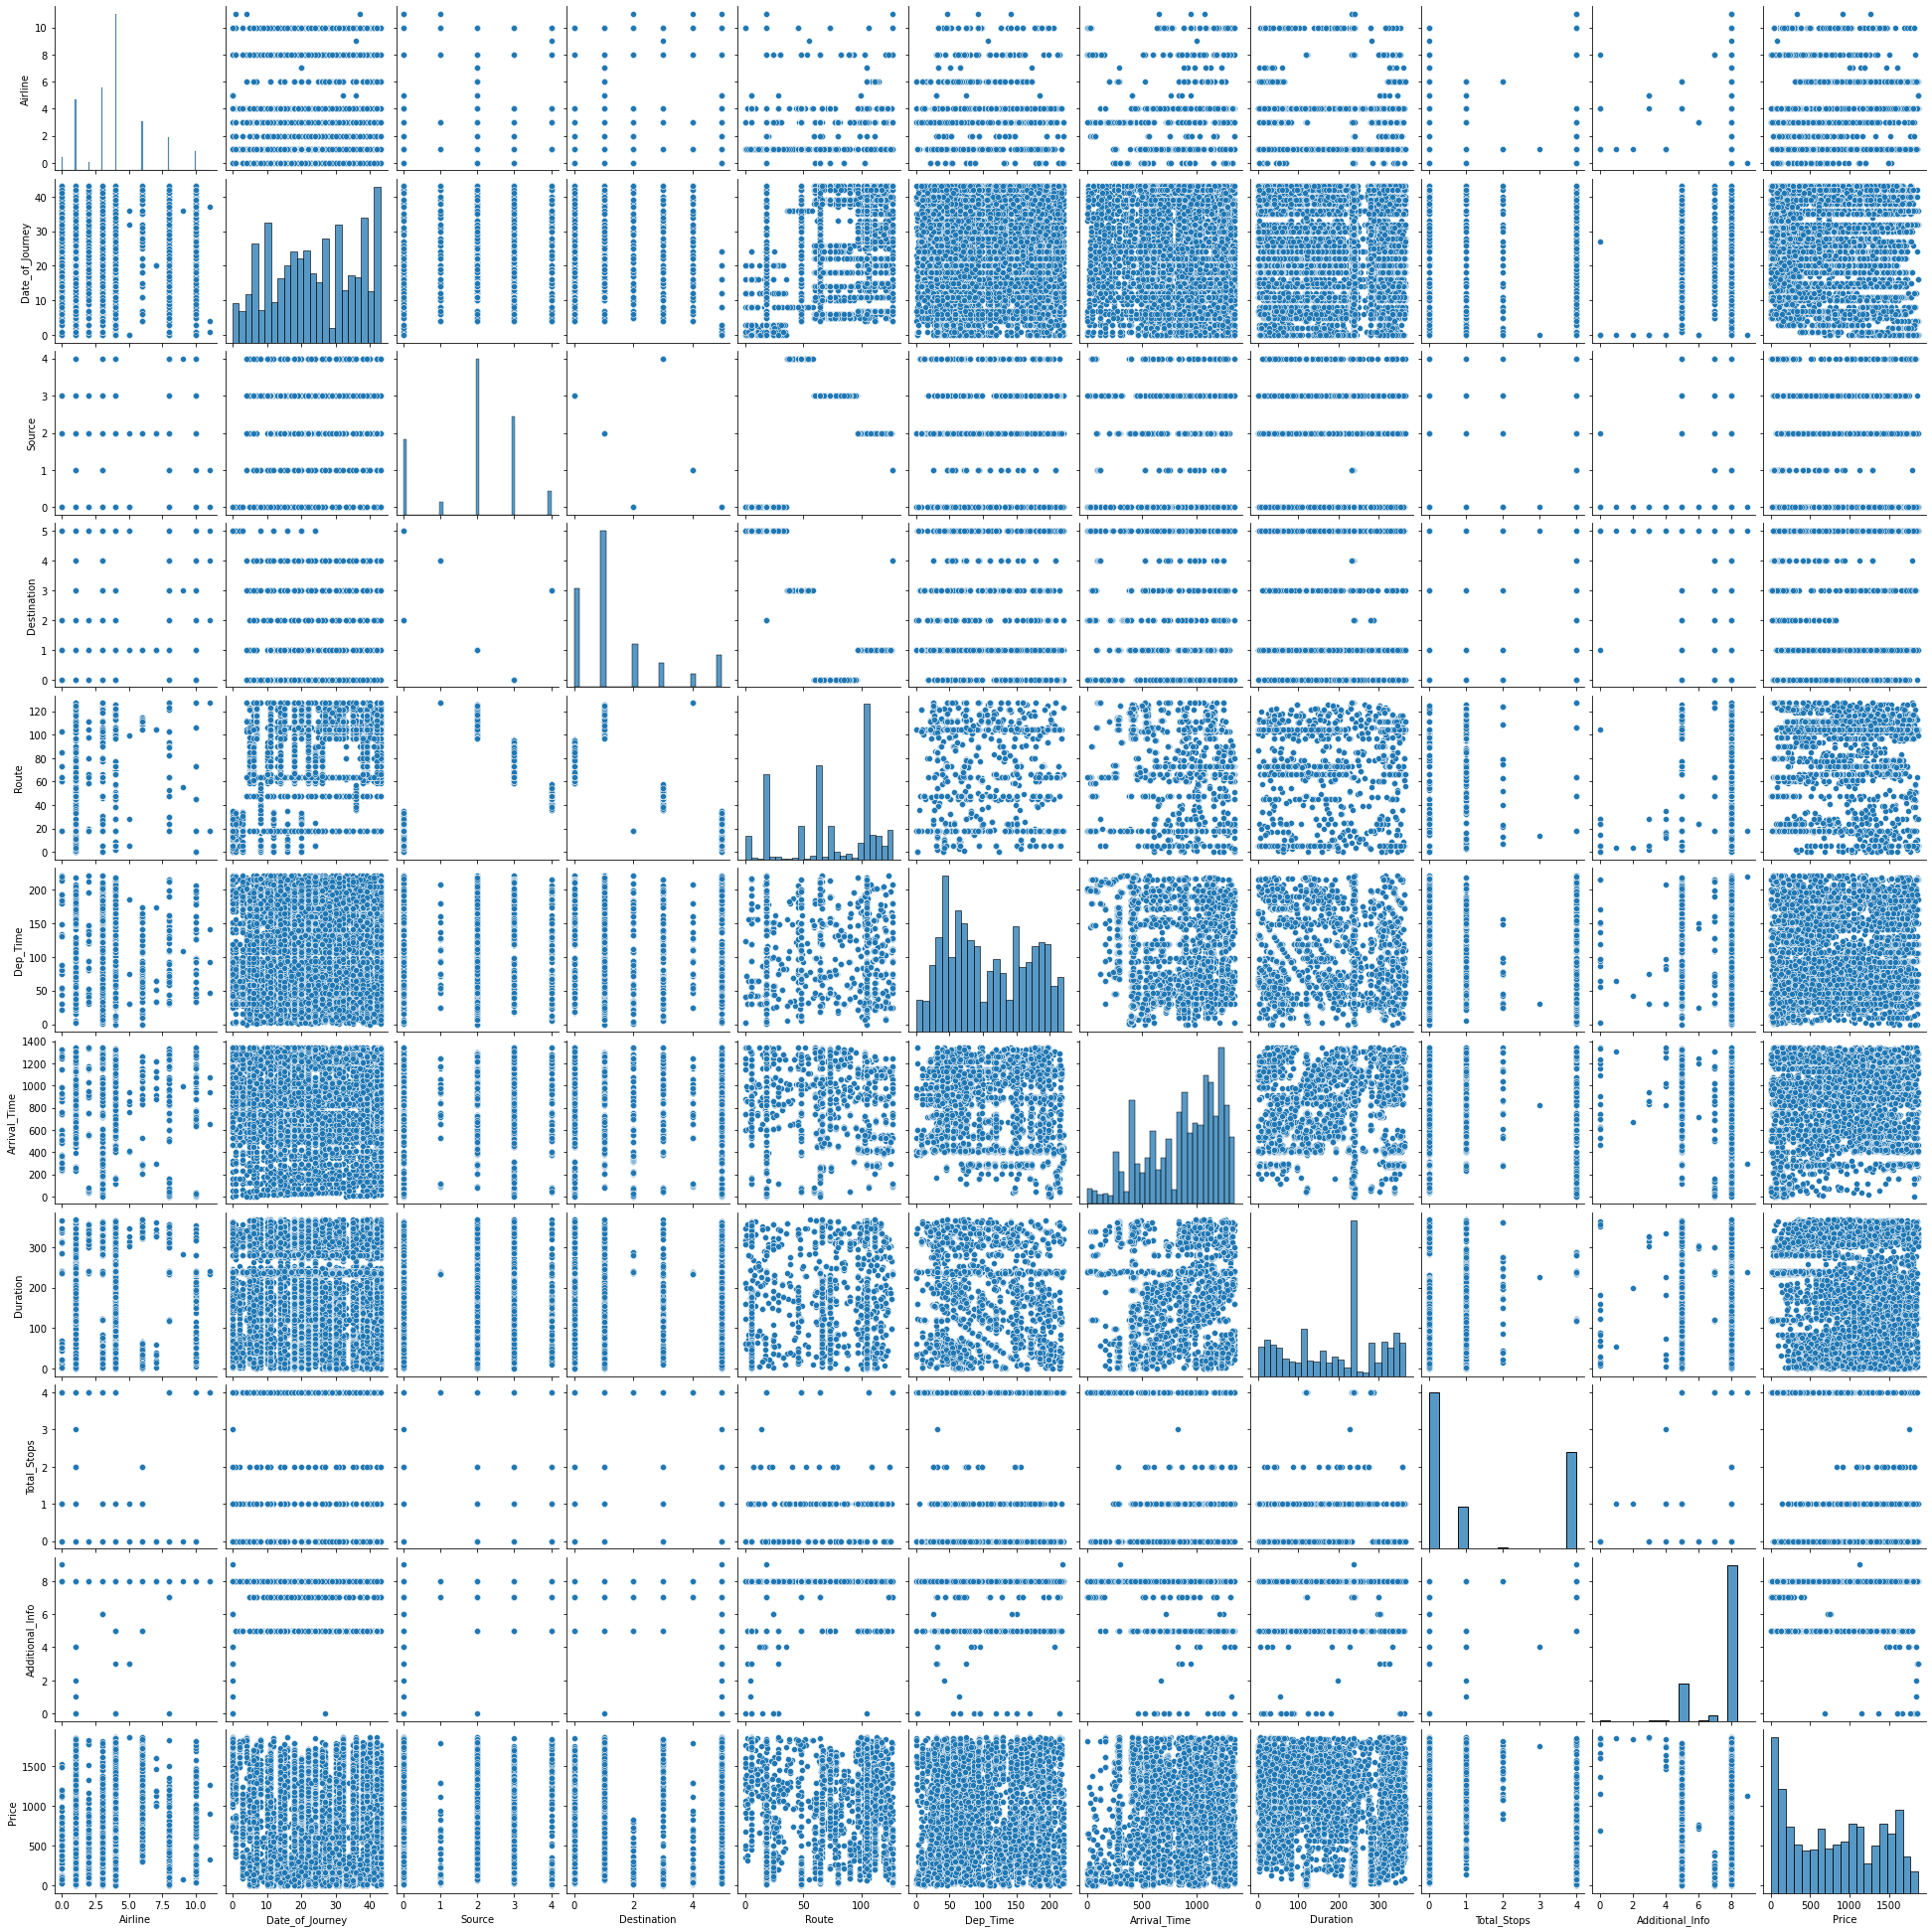

In [33]:
sns.pairplot(df)

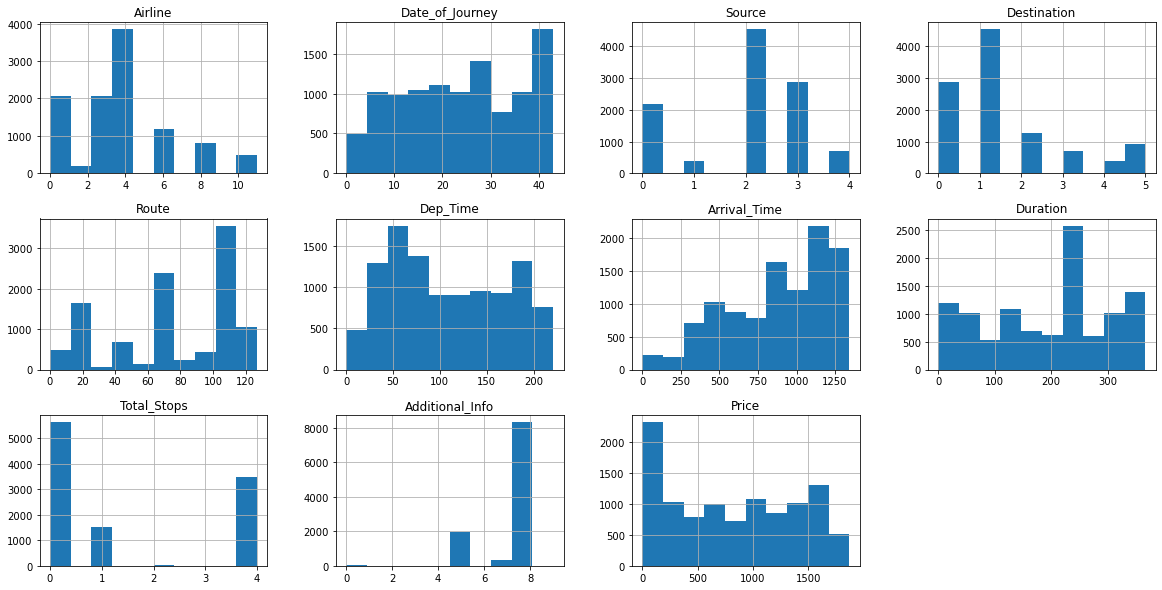

In [34]:
df.hist(figsize=(20,10),layout=(3,4),sharex=False);

In [35]:
corr = df.corr()
corr

Airline  Date_of_Journey    Source  Destination     Route  \
Airline          1.000000         0.022251 -0.013401     0.018479  0.025118   
Date_of_Journey  0.022251         1.000000  0.167549    -0.273357  0.275181   
Source          -0.013401         0.167549  1.000000    -0.592574  0.403403   
Destination      0.018479        -0.273357 -0.592574     1.000000 -0.461183   
Route            0.025118         0.275181  0.403403    -0.461183  1.000000   
Dep_Time        -0.039439        -0.007836  0.055191    -0.063608 -0.082051   
Arrival_Time    -0.015733        -0.012507  0.020844    -0.036830  0.010560   
Duration         0.027917        -0.001168 -0.192009     0.022037 -0.062097   
Total_Stops      0.036064        -0.044152 -0.225601     0.337883 -0.437783   
Additional_Info -0.060802         0.008382 -0.022107     0.026806  0.035188   
Price           -0.043030         0.002629  0.085124    -0.156205  0.243237   

                 Dep_Time  Arrival_Time  Duration  Total_Stops  \
Airline         -0.039439     -0.015733  0.027917     0.036064   
Date_of_Journey -0.007836     -0.012507 -0.001168    -0.044152   
Source           0.055191      0.020844 -0.192009    -0.225601   
Destination     -0.063608     -0.036830  0.022037     0.337883   
Route           -0.082051      0.010560 -0.062097    -0.437783   
Dep_Time         1.000000     -0.023294  0.041619     0.044687   
Arrival_Time    -0.023294      1.000000  0.027746    -0.097132   
Duration         0.041619      0.027746  1.000000     0.175207   
Total_Stops      0.044687     -0.097132  0.175207     1.000000   
Additional_Info -0.052853      0.017505  0.080151     0.164009   
Price            0.004306      0.046430 -0.191956    -0.653260   

                 Additional_Info     Price  
Airline                -0.060802 -0.043030  
Date_of_Journey         0.008382  0.002629  
Source                 -0.022107  0.085124  
Destination             0.026806 -0.156205  
Route                   0.035188  0.243237  
Dep_Time               -0.052853  0.004306  
Arrival_Time            0.017505  0.046430  
Duration                0.080151 -0.191956  
Total_Stops             0.164009 -0.653260  
Additional_Info         1.000000 -0.078445  
Price                  -0.078445  1.000000

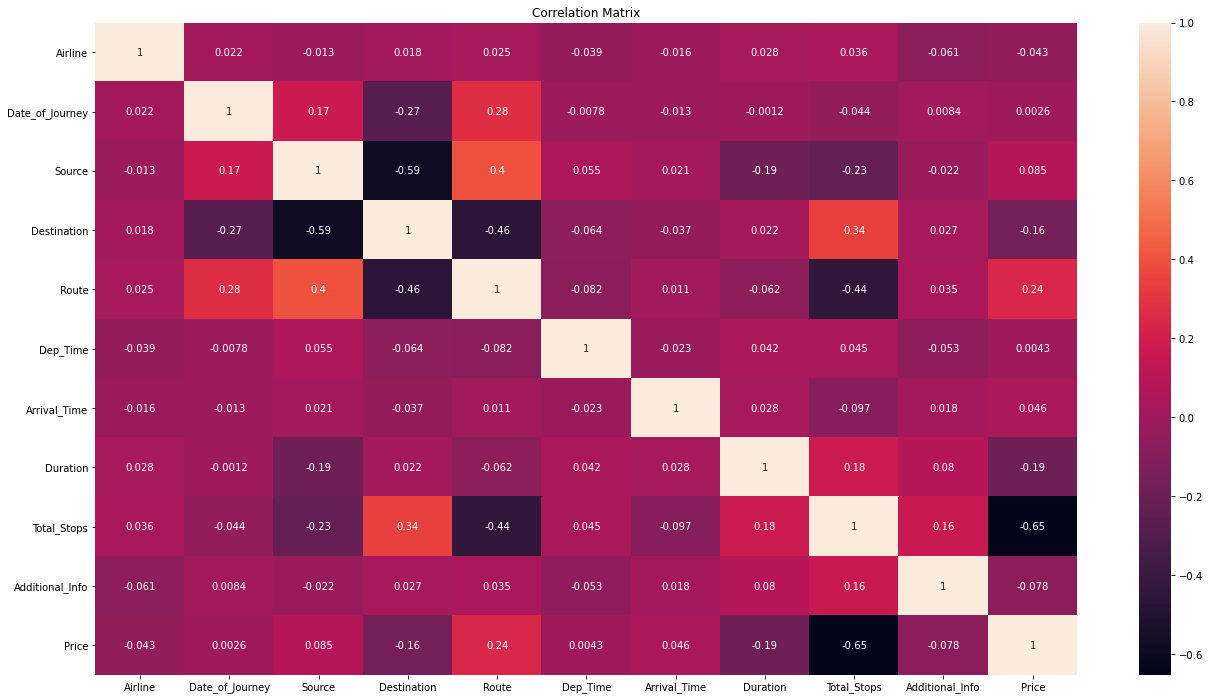

In [36]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

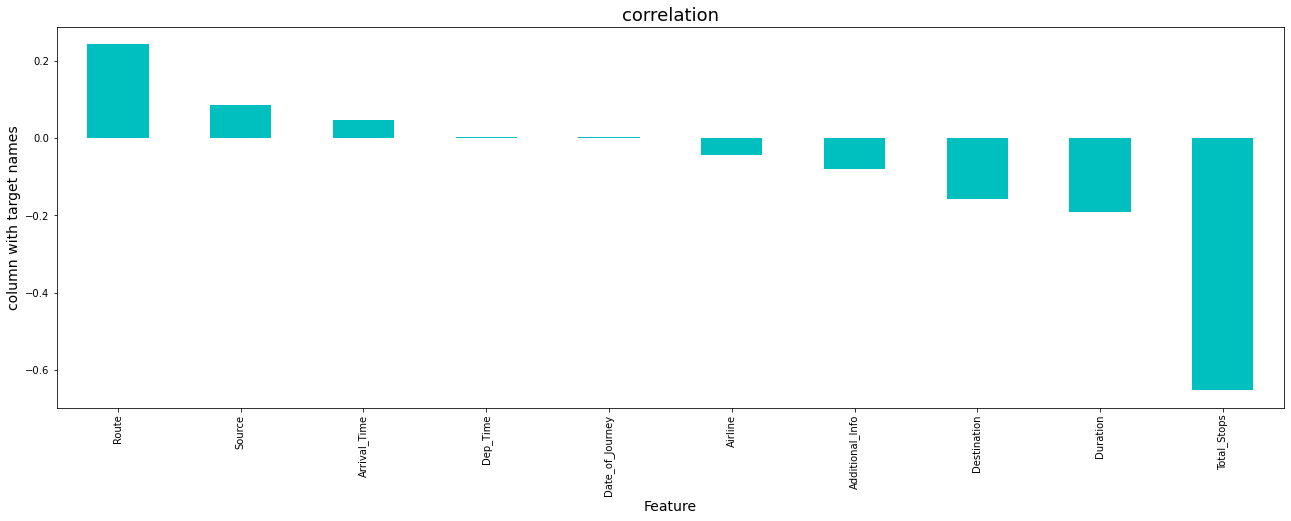

In [37]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [38]:
#boxplot

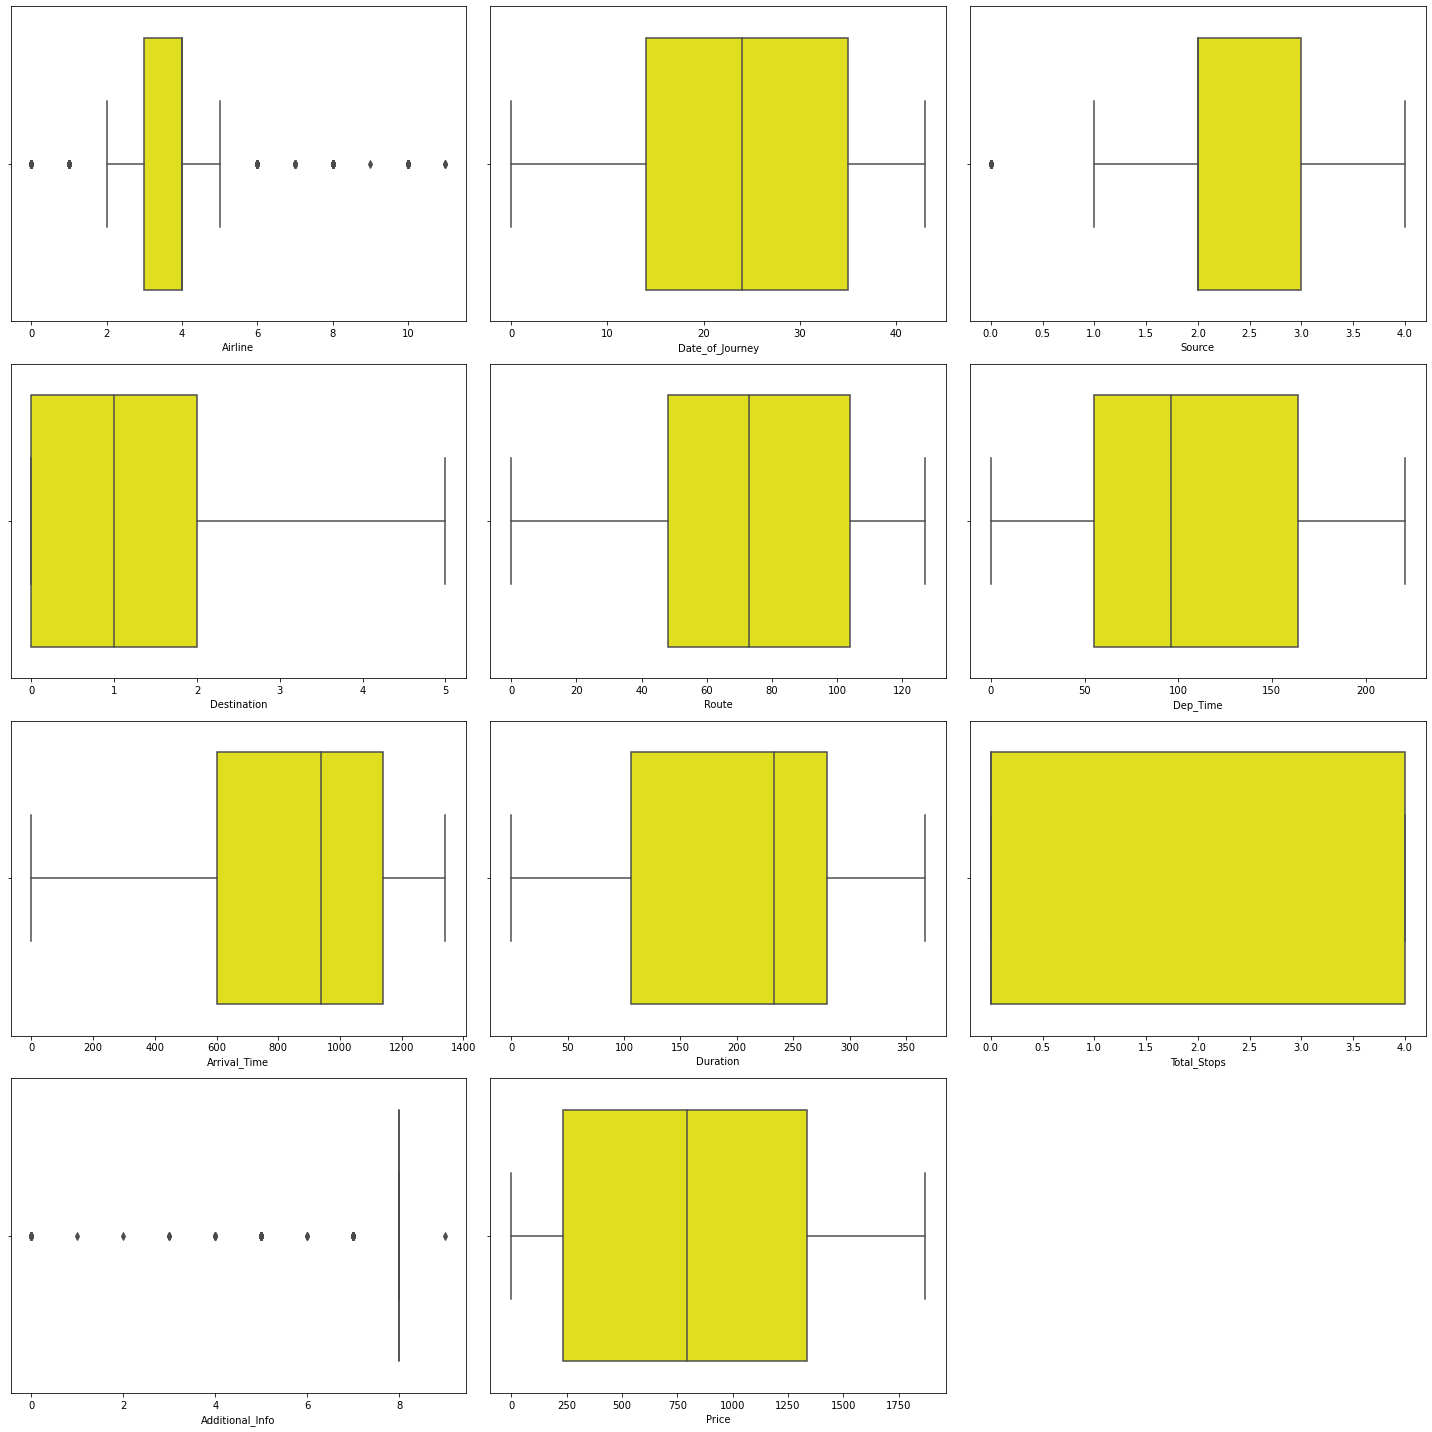

In [39]:
collist=df.columns.values
ncol=3
nrows=4
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='yellow')
    plt.tight_layout()

In [41]:
#outliers are there but categorical all columns

In [42]:
df.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
Price              0.114408
dtype: float64

In [44]:
#skewness are there but categorical columns

In [45]:
# data cleaning

In [46]:
# so proceed ml

In [49]:
x=df.drop(columns=['Price'],axis=1)
y=df['Price']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [51]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state=83)

In [53]:
lr=LinearRegression()
kn=KNeighborsRegressor()
sv=SVR()
gb=GradientBoostingRegressor()

In [54]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.44415978710537707
344.2443687734915
180843.95448084213
0.4420646384390903


In [55]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())


r2 score 0.7737758642418668
179.42028081123246
73602.56843681747
0.7113201670911528


In [58]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.3065996495589822
409.24588074033403
225599.47715752694
0.025618194885625178


In [59]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('r2 score,',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(gb,x,y,cv=5).mean())


r2 score, 0.8388144880852143
165.72731047945564
52442.09523432761
0.8426857452634777


In [60]:
#least score is best model lr

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'fit_intercept':[True, False],
"normalize":[True, False],
"copy_X":[True, False]
}

cvInstance = GridSearchCV(LinearRegression(),param_grid = parameters, cv = 5, scoring = 'r2')
cvInstance.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [63]:
cvInstance.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [64]:
Final_mod = LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

44.41597871053771


In [65]:
# save the model

In [66]:
import joblib
joblib.dump(Final_mod,'flight price.pkl')

['flight price.pkl']